In [1]:
# Copyright © 2021 Helmholtz Centre Potsdam GFZ German Research Centre for Geosciences, Potsdam, Germany
#
# Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
# 
# https://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.
%load_ext autoreload
%autoreload 2
import warnings; warnings.filterwarnings("ignore")

In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


import modelprop

### Auxiliary functions

In [375]:
import numpy as np
from scipy.stats import lognorm

def plot_fragility(model,limit_states,imrange=[],figfilename=''):
    ''' plot fragility curves for all damage states for the same taxonomy'''

    if len(imrange):
        iml = imrange
    else:
        iml = np.arange(float(model.im_min),float(model.im_max),0.01)        
        
    for ls in limit_states:
        mean = model[ls+'_mean']
        stddev = model[ls+'_stddev']
        #print(len(iml),mean,stddev)
        fc=lognorm.cdf(np.log(iml/mean)/float(stddev), s=stddev)
        #fc2=lognorm.cdf(iml,s=stddev,scale=mean)
        plt.plot(iml,fc,label=ls)

    plt.xlabel('{0} ({1})'.format(model.imt,model.imu))
    plt.ylabel('Exceedance Probability')
    plt.title('{} ({})'.format(model.name,model.id))    
    plt.legend()
    plt.grid(True)
    if (figfilename):
        #print ('saving fig {}'.format(figfilename))
        plt.savefig(figfilename,dpi=300)    
    plt.show()

#test
#plot_fragility(frag,ls)

def get_curve(model, tax):
    return(model.data.set_index('taxonomy').loc[tax])

def get_limit_states(metadata):
    return (metadata['limit_states'])

### Test ModelProp 

In [269]:
#create an argument list
from argparse import Namespace
args = Namespace(schema='SARA_v1.0',assetcategory='buildings',
 losscategory='structural',taxonomies='["MUR-H1"]')

#instantiate the class and run the main function
model = modelprop.Main(args)
model.run()

0

### Retrieve limit states and curve parameters, plot it

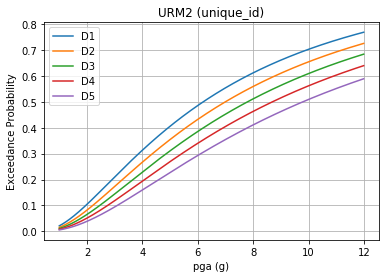

In [374]:

ls = get_limit_states(model.metadata)

frag = get_curve(model,'MUR-H1')

plot_fragility(frag,ls)